# Airbnb price prediction

##  This notebook's goal is of comparing Linear Regression and Random Forest Regression and see which will perform better.

In [1]:
#necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#loading the dataset

df = pd.read_csv("AB_NYC_2019.csv")

# Data Preprocessing.

In [3]:
# getting the size of the dataset
df.shape

(48895, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [9]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
# dropping some columns that will not be used in modelling

cols_to_drop = ['id','host_id','host_name','last_review']

df.drop(cols_to_drop, axis=1, inplace=True)

In [11]:
df.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [12]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Exploratory Data Analysis

<Axes: xlabel='neighbourhood_group'>

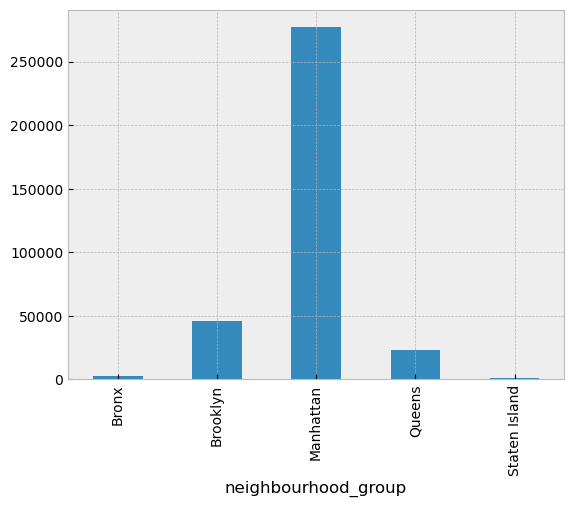

In [13]:
#visualizing listings per neighbourhood

viz = df.groupby('neighbourhood_group').calculated_host_listings_count.sum()

plt.style.use('bmh')
viz.plot(kind='bar')

<Axes: xlabel='neighbourhood_group', ylabel='count'>

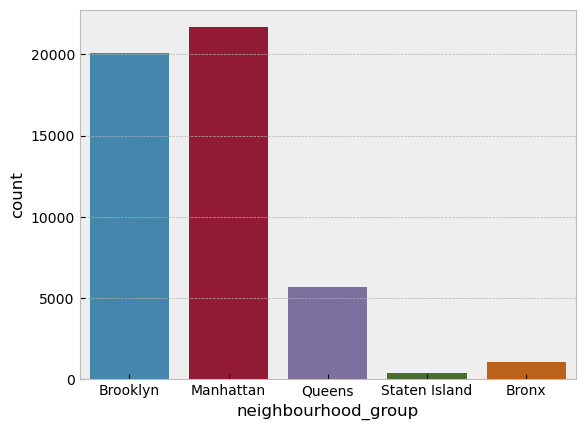

In [14]:
#visual representation of the distribution of 'neighbourhood_group' values in the dataset.

sns.countplot(x='neighbourhood_group', data=df)

### Observations:

1. The number of host listings are highest in Manhattan, closely followed by Brooklyn.
2. Manhattan has the highest number of listings in the entire New York area and Staten Island has the least number of listings.

Text(0, 0.5, 'neighborhoods')

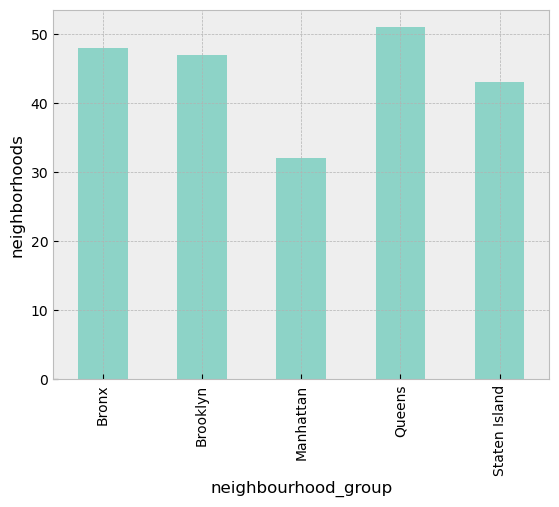

In [15]:
#analysing the neighbourhoods in each of the 5 NY Boroughs

df.groupby('neighbourhood_group')['neighbourhood'].nunique().plot(kind='bar', colormap='Set3')

plt.xlabel('neighbourhood_group')
plt.ylabel('neighborhoods')



### Observations:

Although Manhattan has the highest number of listings, it does not have the most neighbourhoods.
Queens has the highest number of neighbourhoods. The code below displays the exact number of neighbourhoods for each Borough.

In [16]:
print(df.groupby('neighbourhood_group')['neighbourhood'].nunique())

neighbourhood_group
Bronx            48
Brooklyn         47
Manhattan        32
Queens           51
Staten Island    43
Name: neighbourhood, dtype: int64


#### Analyzing the room types

In [17]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

<Axes: xlabel='room_type', ylabel='count'>

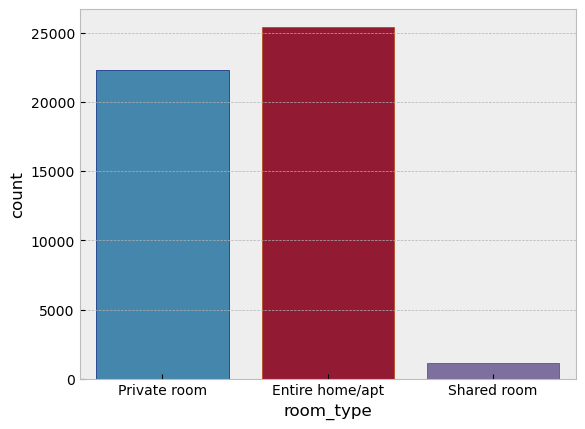

In [18]:
sns.countplot(x='room_type', data=df, edgecolor=sns.color_palette("dark", 3))

#### Observations:
Entire home/apt has the highest number of listings closely followed by Private room. It seems that Shared room has the least number of listings.

The code below will display the exact count for each:

In [19]:
df.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Text(0, 0.5, 'Room type/ Borough')

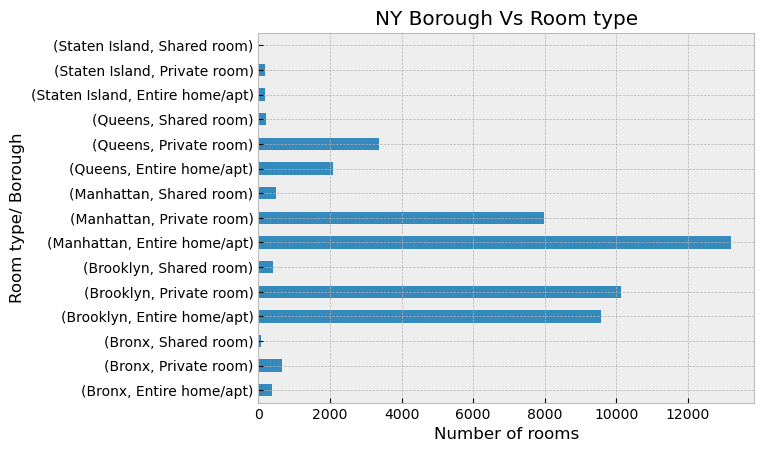

In [20]:
#visualizing the roomtypes according to each NY Borough

df.groupby(['neighbourhood_group','room_type']).room_type.count().plot.barh(stacked=True)

plt.title('NY Borough Vs Room type')
plt.xlabel('Number of rooms')
plt.ylabel('Room type/ Borough')

#### Observations:
1. More than 50% of the room types available are Entire houses/ apartments. About 47% is Private Rooms while only 2% are Shared Rooms.

2. Manhattan has the highest number of Entire home/apt .

3. Brooklyn has the highest number of Private rooms.

4. The Bronx, Staten Island and Queens have the least number of listings registered. Staten Island being the lowest among the 3

#### Analyzing the prices of the room types

In [21]:
df.groupby('neighbourhood_group').price.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


#### Observations:
1. Manhattan has the highest average of airbnb prices.
2. The Bronx has the least average of airbnb prices.

In [22]:
df.drop(['latitude', 'longitude', 'name'], axis=1, inplace=True)

C:\Users\Gitaka\AppData\Local\Temp\ipykernel_11620\2731549597.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True)


<Axes: >

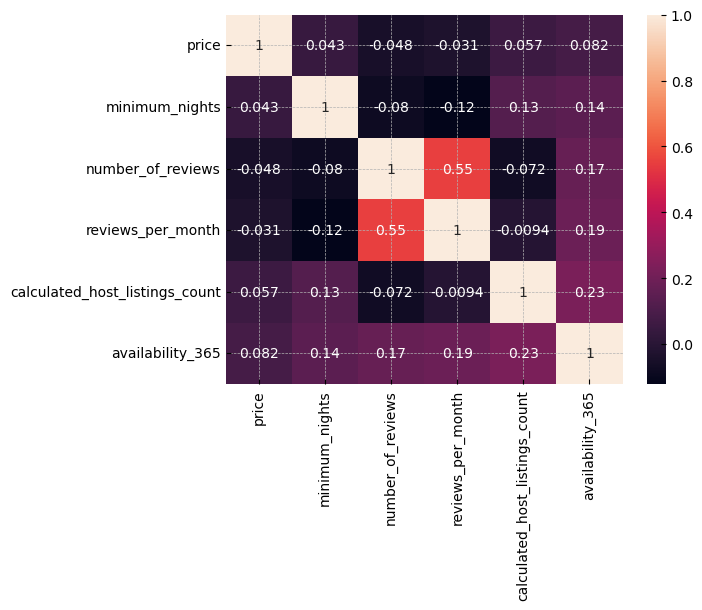

In [23]:
# correlation analysis

sns.heatmap(data=df.corr(), annot=True)

<Axes: xlabel='room_type', ylabel='price'>

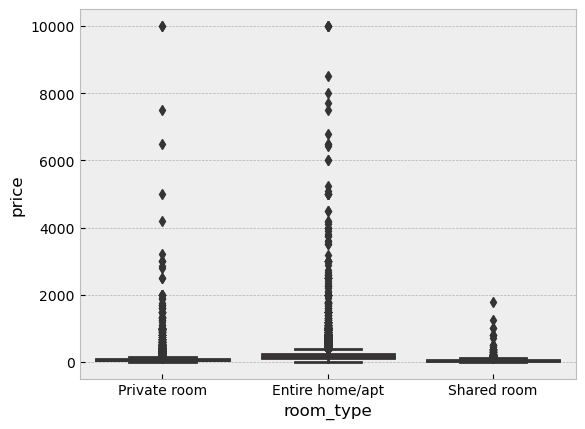

In [24]:
# visualizing the price against roomtype

sns.boxplot(data=df, x='room_type', y='price')

<Axes: xlabel='neighbourhood_group', ylabel='price'>

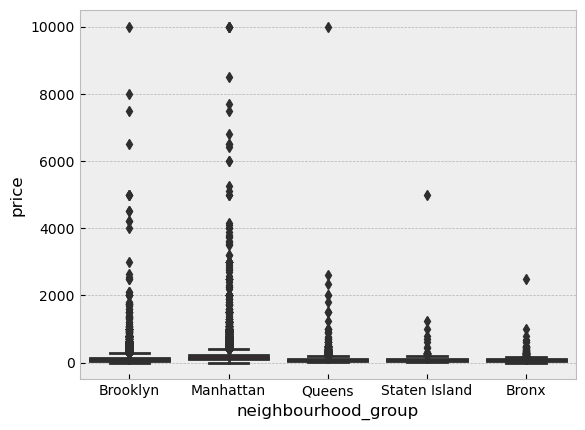

In [25]:
# visualizing the price against Borough

sns.boxplot(data=df, x='neighbourhood_group', y='price')

## Feature Engineering

In [26]:
df['reviews_per_month'] = df['reviews_per_month'].apply(lambda s: 'No' if s == '0' else 'yes')

In [27]:
df['reviews_per_month'].value_counts()

yes    48895
Name: reviews_per_month, dtype: int64

In [28]:
df['is_zero'] = df['availability_365'].apply(lambda s: 'zero' if s == 0 else 'nonzero')

In [29]:
# visualizing the df

df.head(10)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,is_zero
0,Brooklyn,Kensington,Private room,149,1,9,yes,6,365,nonzero
1,Manhattan,Midtown,Entire home/apt,225,1,45,yes,2,355,nonzero
2,Manhattan,Harlem,Private room,150,3,0,yes,1,365,nonzero
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,yes,1,194,nonzero
4,Manhattan,East Harlem,Entire home/apt,80,10,9,yes,1,0,zero
5,Manhattan,Murray Hill,Entire home/apt,200,3,74,yes,1,129,nonzero
6,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,yes,1,0,zero
7,Manhattan,Hell's Kitchen,Private room,79,2,430,yes,1,220,nonzero
8,Manhattan,Upper West Side,Private room,79,2,118,yes,1,0,zero
9,Manhattan,Chinatown,Entire home/apt,150,1,160,yes,4,188,nonzero


### Scaling the data

In [30]:
# Grouping the numerical and categorical columns:

X_num = df[['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]
X_cat = df.drop(['minimum_nights', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'price'], axis=1)

In [31]:
# scaling the categorical columns using LabelEncoder

lab_enc = LabelEncoder()
for i in X_cat.columns:
    X_cat[i] = lab_enc.fit_transform(X_cat[i])

In [32]:
# scaling numerical columns using the StandardScaler

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

In [33]:
# checking if the df is scaled

X.head(10)

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type,reviews_per_month,is_zero
0,-0.293996,-0.320414,-0.034716,1.916250,1,108,1,0,0
1,-0.293996,0.487665,-0.156104,1.840275,2,127,0,0,0
2,-0.196484,-0.522433,-0.186451,1.916250,2,94,1,0,0
3,-0.293996,5.538156,-0.186451,0.617065,1,41,0,0,0
4,0.144807,-0.320414,-0.186451,-0.856865,2,61,0,0,1
5,-0.196484,1.138617,-0.186451,0.123223,2,137,0,0,0
6,1.851263,0.577451,-0.186451,-0.856865,1,13,1,0,1
7,-0.245240,9.129616,-0.186451,0.814602,2,95,1,0,0
8,-0.245240,2.126269,-0.186451,-0.856865,2,202,1,0,1
9,-0.293996,3.069027,-0.095410,0.571480,2,35,0,0,0


## Model Building:

In [34]:
# Splitting into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Random Forest Regressor Model

In [35]:
RF_mod = RandomForestRegressor()
RF_mod.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
pred_RF = RF_mod.predict(X_test)
print(mean_absolute_error(y_test, pred_RF))
print(sqrt(mean_squared_error(y_test, pred_RF)))

71.35397095054786
254.57558491644798


### Linear Regression Model

In [37]:
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_train, y_train)

LinearRegression()

In [38]:
pred_LIN = lin_reg_mod.predict(X_test)
print(mean_absolute_error(y_test, pred_LIN))
print(sqrt(mean_squared_error(y_test, pred_LIN)))

77.45790993850255
245.1407916833854


## Analyzing the 2 Models:

As seen above, the Random Forest Regression model performs better as it has a lower mean absolute error as compared to the Linear Regression Model.